#Creating our own dataset using Google Images
In this notebook we are creating our own dataset of teddy bear, black bear and grizzly bear and try to classify between them.We are going to use following javascript code to download the images from Google Images.

**javascript code**:

urls = Array.from(document.querySelectorAll('.rg_di .rg_meta')).map(el=>JSON.parse(el.textContent).ou);

window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));






In [1]:
#importing the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#importing the required packages
from fastai.vision import *
from fastai.metrics import error_rate

In [3]:
cd drive/My\ Drive

/content/drive/My Drive


In [0]:
#creating directory
path = Path('/content/')
dest = path/'black'
dest.mkdir(parents = True, exist_ok = True)

dest = path/'teddy'
dest.mkdir(parents=True, exist_ok=True)

dest = path/'grizzly'
dest.mkdir(parents=True, exist_ok=True)


In [0]:
#downloading images
download_images(path/'blackbear.txt', path/'black', max_pics = 250)
download_images(path/'teddybear.txt', path/'teddy', max_pics = 250)
download_images(path/'grizzlybear.txt', path/'grizzly', max_pics = 250)

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#deleting corrupted images
classes = ['black','grizzly','teddy']

for c in classes:
  print(c)
  verify_images(path/c, delete = True, max_size = 500)

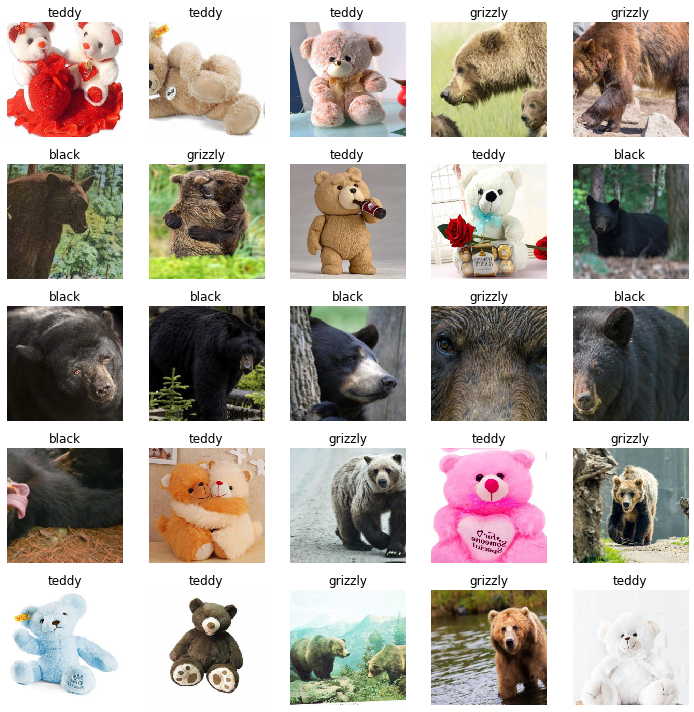

In [15]:
#view data
data = ImageDataBunch.from_folder(path, train='.', valid_pct = 0.2, seed=66,
                                  ds_tfms = get_transforms(), size = 224).normalize(imagenet_stats)
data.show_batch(rows = 5, figsize = (10,10))

In [16]:
print(data.classes)
print(len(data.train_ds))
print(len(data.valid_ds))

['black', 'grizzly', 'teddy']
534
133


#Training

In [17]:
learn = cnn_learner(data, models.resnet34, metrics = error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:02<00:00, 34.4MB/s]


In [18]:
learn.fit_one_cycle(12)

epoch,train_loss,valid_loss,error_rate,time
0,1.136643,0.172172,0.075188,00:12
1,0.669999,0.052768,0.037594,00:11
2,0.492882,0.079830,0.037594,00:11
3,0.400863,0.101396,0.037594,00:11
4,0.319659,0.119691,0.037594,00:10
5,0.271358,0.091638,0.022556,00:10
6,0.230509,0.121489,0.030075,00:11
7,0.224179,0.097905,0.030075,00:10
8,0.191646,0.080362,0.015038,00:11
9,0.167016,0.075274,0.015038,00:11


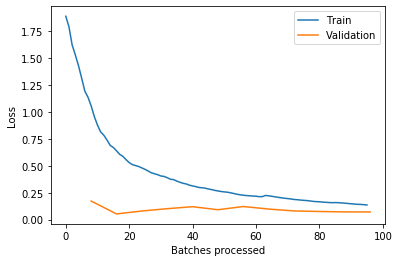

In [19]:
learn.recorder.plot_losses()

In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


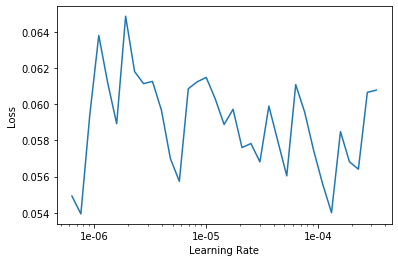

In [22]:
learn.lr_find()
learn.recorder.plot()

In [23]:
learn.fit_one_cycle(3,max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.100048,0.096052,0.030075,00:11
1,0.088705,0.109379,0.037594,00:11
2,0.075923,0.118096,0.030075,00:11


This doesn't help much so we use the stage-1 training.

In [0]:
learn.save('stage-2')

#Interpretation

In [0]:
learn.load('stage-1');

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

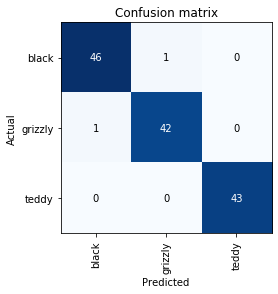

In [27]:
interp.plot_confusion_matrix()

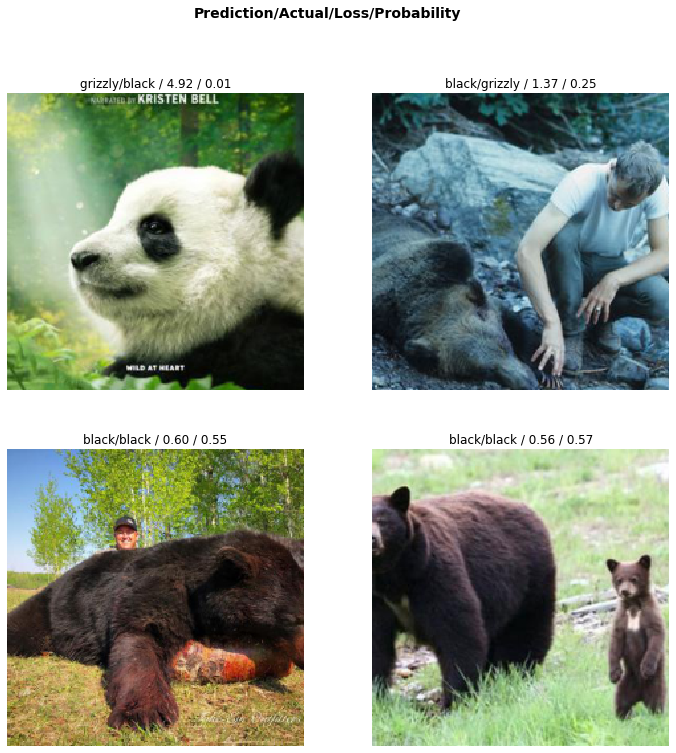

In [28]:
interp.plot_top_losses(k = 4, heatmap=False)

#Prediction

In [0]:
defaults.device = torch.device('cpu')

In [0]:
learn.export()

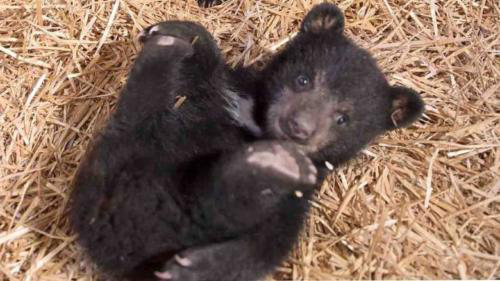

In [32]:
#example image
img = open_image(path/'black/00000066.jpeg')
img

In [0]:
learn = load_learner(path)

In [34]:
pred,idx,outputs = learn.predict(img)
print('Predicted class: ',pred)

Predicted class:  black


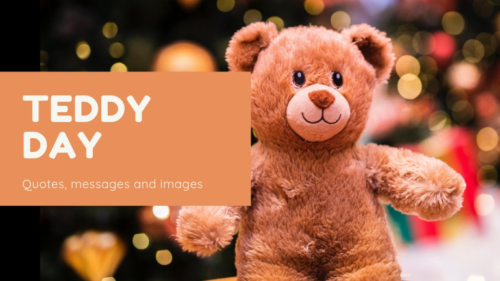

In [38]:
img = open_image(path/'teddy/00000001.png')
img

In [39]:
pred,idx,outputs = learn.predict(img)
print('Prediction: ',pred)

Prediction:  teddy
